# Проект "Математика"
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Описание модели
1 school — аббревиатура школы, в которой учится ученик <br />
2 sex — пол ученика ('F' - женский, 'M' - мужской) <br />
3 age — возраст ученика (от 15 до 22) <br />
4 address — тип адреса ученика ('U' - городской, 'R' - за городом) <br />
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3) <br />
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно) <br />
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <br />
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <br />
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <br />
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <br />
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) <br />
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое) <br />
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) <br />
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) <br />
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0) <br />
16 schoolsup — дополнительная образовательная поддержка (yes или no) <br />
17 famsup — семейная образовательная поддержка (yes или no) <br />
18 paid — дополнительные платные занятия по математике (yes или no) <br />
19 activities — дополнительные внеучебные занятия (yes или no) <br />
20 nursery — посещал детский сад (yes или no) <br />
21 higher — хочет получить высшее образование (yes или no) <br />
22 internet — наличие интернета дома (yes или no) <br />
23 romantic — в романтических отношениях (yes или no) <br />
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) <br />
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого) <br />
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много) <br />
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) <br />
28 absences — количество пропущенных занятий <br />
29 score — баллы по госэкзамену по математике <br />

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

df = pd.read_csv('stud_math.csv')

In [111]:
display(df.head())
display(df.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

None

### studytime, granular
В наборе присутствует столбец "studytime, granular", который не описан в модели. Исходя из данных в столбце, можно сделать вывод, что значения в нем получены путем умножения -3 на столбец studytime. Поэтому будет целесообразно его удалить, так как он полностью коррелирован с studytime.

In [112]:
df.drop(columns=['studytime, granular'], inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       378 non-null object
famsize       368 non-null object
Pstatus       350 non-null object
Medu          392 non-null float64
Fedu          371 non-null float64
Mjob          376 non-null object
Fjob          359 non-null object
reason        378 non-null object
guardian      364 non-null object
traveltime    367 non-null float64
studytime     388 non-null float64
failures      373 non-null float64
schoolsup     386 non-null object
famsup        356 non-null object
paid          355 non-null object
activities    381 non-null object
nursery       379 non-null object
higher        375 non-null object
internet      361 non-null object
romantic      364 non-null object
famrel        368 non-null float64
freetime      384 non-null float64
goout         387 non-null float64
heal

None

# Первичная обработка данных

## Очистка числовых данных
В наборе 12 числовых столбцов. В некоторых из них (Medu, Fedu, traveltime и др) есть пустые значения. Обработаем столбцы и применим промежуточное решение (способ заполнения будет определяться позднее): в случае наличия пропусков, будем заполнять средним значением по столбцу.

In [113]:
def clear_number_columns(df, column):
    if (df[column].dtype == np.object):
        return;
    print(column)
    mean = df[column].mean()
    count_nan = len(df[column]) - df[column].count()
    print('       До: Нулевых {0:3}, Среднее {1}'.format(
        count_nan, round(mean, 2)))
    df[column] = df[column].apply(lambda x: mean if math.isnan(x) else x)
    mean = df[column].mean()
    count_nan = len(df[column]) - df[column].count()
    print('    После: Нулевых {0:3}, Среднее {1}'.format(
        count_nan, round(mean, 2)))


for column in df.columns:
    clear_number_columns(df, column)

age
       До: Нулевых   0, Среднее 16.7
    После: Нулевых   0, Среднее 16.7
Medu
       До: Нулевых   3, Среднее 2.75
    После: Нулевых   0, Среднее 2.75
Fedu
       До: Нулевых  24, Среднее 2.61
    После: Нулевых   0, Среднее 2.61
traveltime
       До: Нулевых  28, Среднее 1.44
    После: Нулевых   0, Среднее 1.44
studytime
       До: Нулевых   7, Среднее 2.04
    После: Нулевых   0, Среднее 2.04
failures
       До: Нулевых  22, Среднее 0.34
    После: Нулевых   0, Среднее 0.34
famrel
       До: Нулевых  27, Среднее 3.94
    После: Нулевых   0, Среднее 3.94
freetime
       До: Нулевых  11, Среднее 3.23
    После: Нулевых   0, Среднее 3.23
goout
       До: Нулевых   8, Среднее 3.11
    После: Нулевых   0, Среднее 3.11
health
       До: Нулевых  15, Среднее 3.53
    После: Нулевых   0, Среднее 3.53
absences
       До: Нулевых  12, Среднее 7.28
    После: Нулевых   0, Среднее 7.28
score
       До: Нулевых   6, Среднее 52.26
    После: Нулевых   0, Среднее 52.26


## Очистка номинативных данных
В наборе присутствует 17 столбцов с номинативными данными, в которых есть пропуски. **Исключать такие данные не будем**, но заменим пропуски на строку 'Unknown'.

In [114]:
def clear_object_columns(df, column):
    if (df[column].dtype != np.object):
        return;
    print(column)    
    count_nan = len(df[column]) - df[column].count()
    print('       До: Нулевых {0:3}'.format(count_nan))
    df[column] = df[column].astype('str').apply(lambda x: 'Unknown' if x.strip() == '' else x)    
    count_nan = len(df[column]) - df[column].count()
    print('    После: Нулевых {0:3}'.format(count_nan))

for column in df.columns:
    clear_object_columns(df, column)

school
       До: Нулевых   0
    После: Нулевых   0
sex
       До: Нулевых   0
    После: Нулевых   0
address
       До: Нулевых  17
    После: Нулевых   0
famsize
       До: Нулевых  27
    После: Нулевых   0
Pstatus
       До: Нулевых  45
    После: Нулевых   0
Mjob
       До: Нулевых  19
    После: Нулевых   0
Fjob
       До: Нулевых  36
    После: Нулевых   0
reason
       До: Нулевых  17
    После: Нулевых   0
guardian
       До: Нулевых  31
    После: Нулевых   0
schoolsup
       До: Нулевых   9
    После: Нулевых   0
famsup
       До: Нулевых  39
    После: Нулевых   0
paid
       До: Нулевых  40
    После: Нулевых   0
activities
       До: Нулевых  14
    После: Нулевых   0
nursery
       До: Нулевых  16
    После: Нулевых   0
higher
       До: Нулевых  20
    После: Нулевых   0
internet
       До: Нулевых  34
    После: Нулевых   0
romantic
       До: Нулевых  31
    После: Нулевых   0


## Проверка заполненонсти набора данных
Убедимся, что все столбцы заполненны данными без пропусков (будем держать в голове, что номинативные данные мы заполняли строкой 'Unknown').

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null float64
Fedu          395 non-null float64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null float64
studytime     395 non-null float64
failures      395 non-null float64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null float64
freetime      395 non-null float64
goout         395 non-null float64
heal

#  Распределение признаков для числовых переменных, устранение выбросов
Главная задача - убедиться в отсутствии выбросов. Если выбросу будут обнаружены, придется отфильтровывать эти значения.
Числовых признаков ровно 12, поэтому построим 12 гистограмм: 4 ряда по 3 столбца.

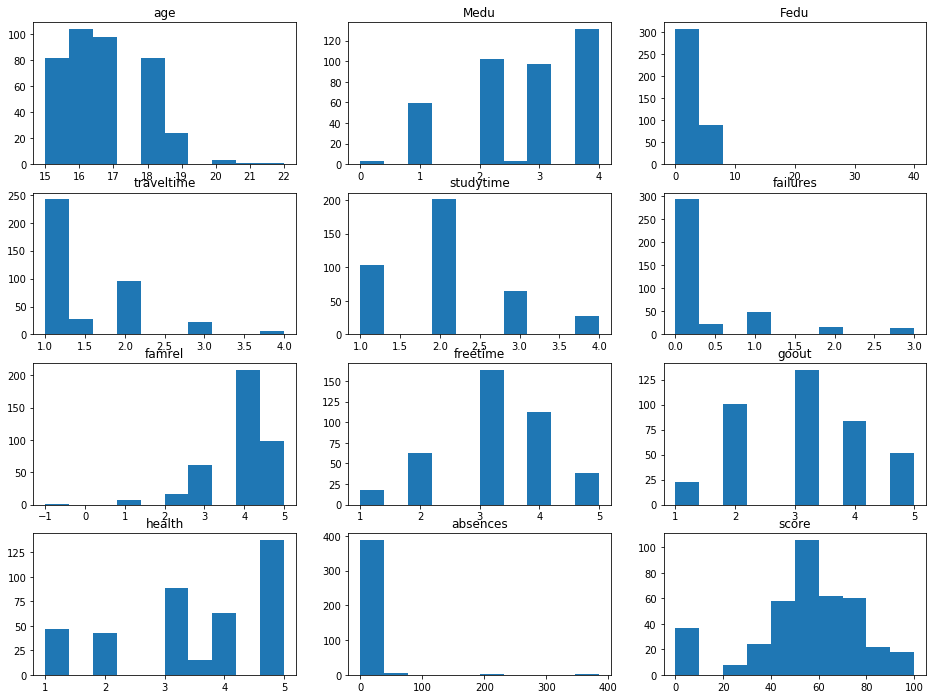

In [134]:
col_count = 3
row_count = 4
fig, axes = plt.subplots(row_count, col_count, figsize = (16, 12))

number = 0
for column in df.columns:
    if (df[column].dtype != np.object):        
        row = number // col_count
        col = number % col_count
        axes[row, col].hist(df[column])
        axes[row, col].set_title(column)
        number += 1

# Оценка количества уникальных значений, преобразование данных

# Корреляционный анализ количественных переменных

# Анализ номинативных переменных

# Выводы разведывательного анализа